<a href="https://colab.research.google.com/github/Swetha-18/Case-study1/blob/main/Casestudy_Numpy_%2B_Pandas_Swetha_Bonkuri_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df_data = pd.read_csv('u.data', sep='\t', names=['user_id', 'movie_id', 'rating', 'timestamp'])
df_item = pd.read_csv('u.item', sep='|', encoding='latin-1', header=None)
df_user = pd.read_csv('u.user', sep='|', names=['user_id', 'age', 'gender', 'occupation', 'zip_code'])

In [ ]:
# Display univariate plots of the attributes: 'rating', 'age', 'release date', 'gender' and'occupation',
# from their respective data frames

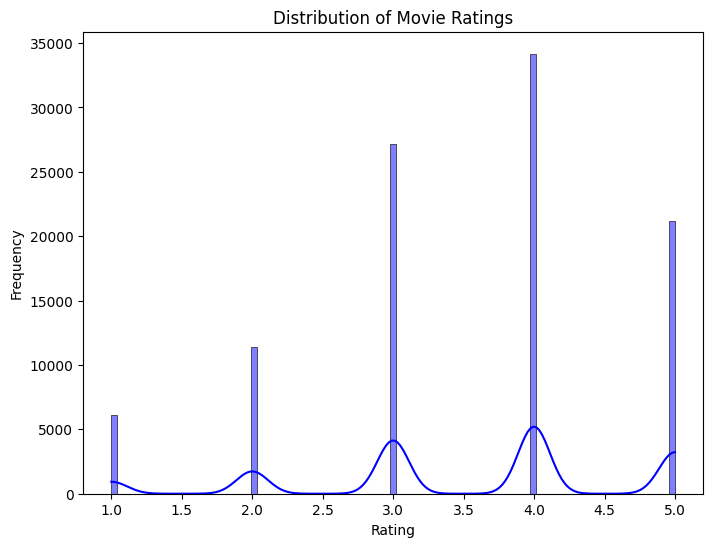

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of 'rating'
plt.figure(figsize=(8, 6))
sns.histplot(df_data['rating'], kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

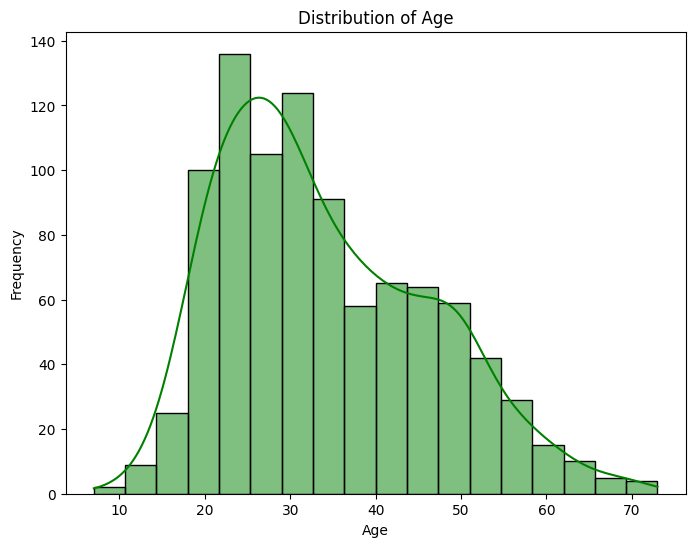

In [ ]:
# Plot distribution of 'age'
plt.figure(figsize=(8, 6))
sns.histplot(df_user['age'], kde=True, color='green', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

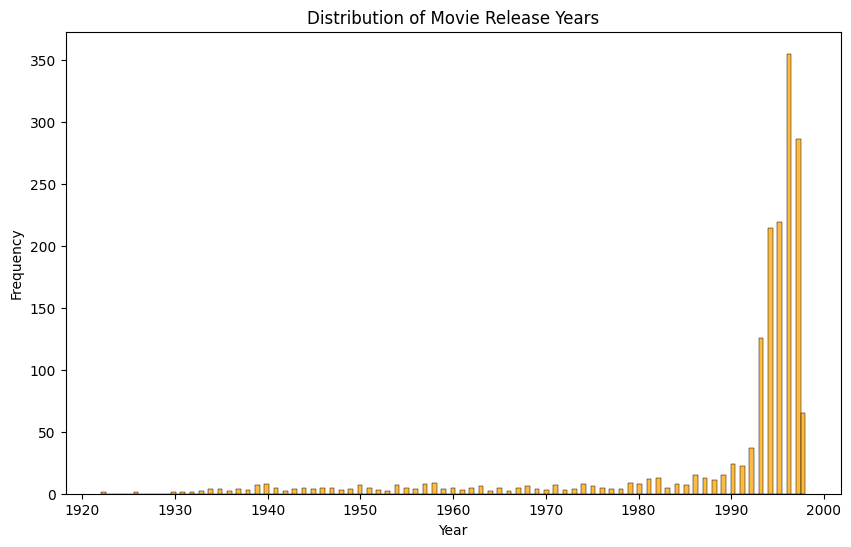

In [ ]:
# Considering 'release_date' is in datetime format
df_item[2] = pd.to_datetime(df_item[2])
# Plot distribution of 'release_date'
plt.figure(figsize=(10, 6))
sns.histplot(df_item[2].dt.year, kde=False, color='orange', edgecolor='black')
plt.title('Distribution of Movie Release Years')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

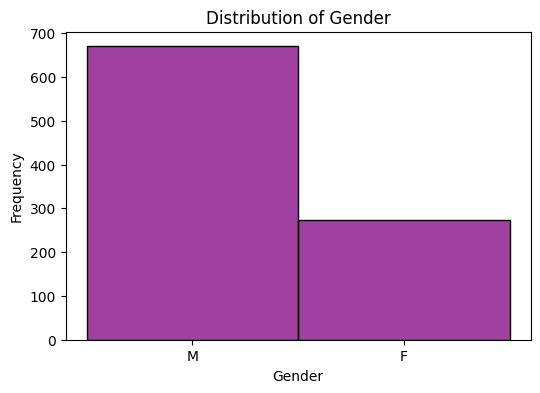

In [ ]:
# Plot distribution of 'gender'
plt.figure(figsize=(6, 4))
sns.histplot(df_user['gender'], color='purple', edgecolor='black')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

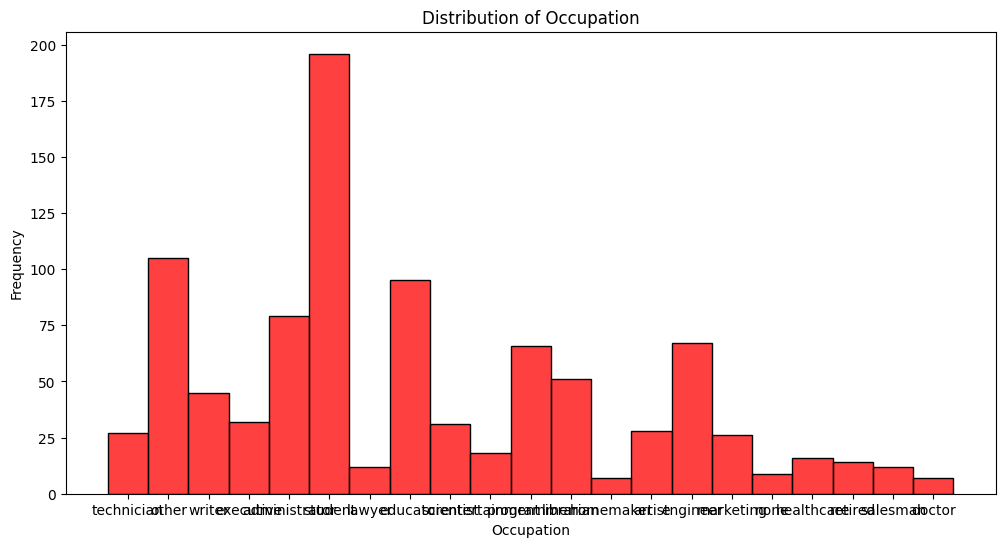

In [ ]:
# Plot distribution of 'occupation'
plt.figure(figsize=(12, 6))
sns.histplot(df_user['occupation'], color='red', edgecolor='black')
plt.title('Distribution of Occupation')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Visualize how popularity of Genres has changed over the years. From the graph
# one should be able to see for any given year, movies of which genre got released the most.

In [ ]:
import pandas as pd

data = {'movie_id': [1, 2, 3, 4, 5],
    'title': ['Movie 1', 'Movie 2', 'Movie 3', 'Movie 4', 'Movie 5'],
    'genre': ['Drama', 'Comedy', 'Action', 'Romance', 'Sci-Fi'],
    'release_date': ['1995-01-01', '1996-02-15', '1997-03-30', '1998-05-12', '1999-07-25']}

# Creating the 'df_movies' DataFrame
df_movies = pd.DataFrame(data)

# Converting 'release_date' to datetime format
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

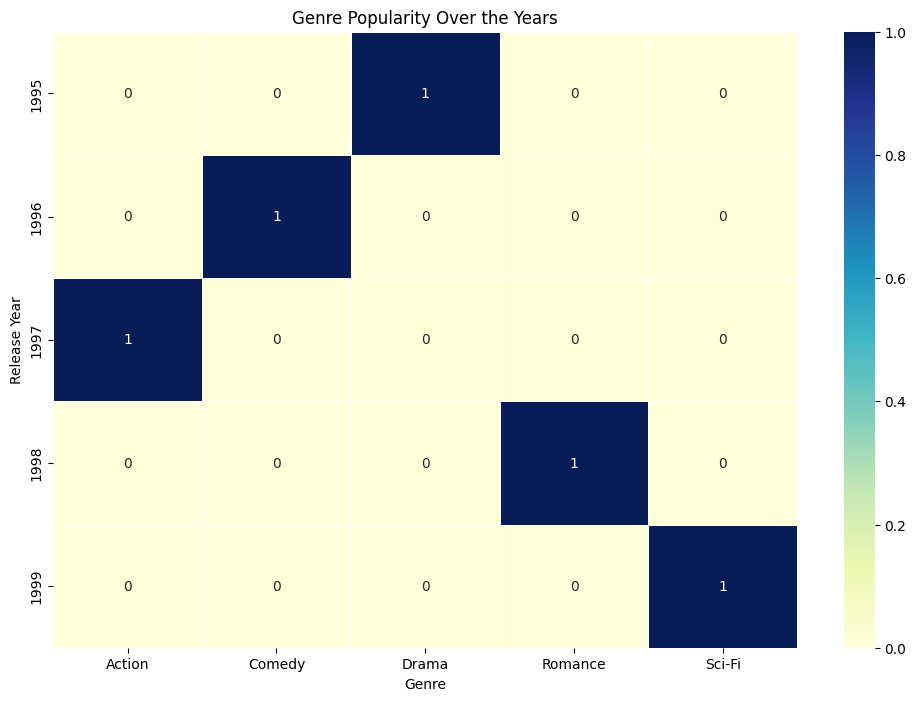

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# Extract the year from 'release_date'
df_movies['release_year'] = df_movies['release_date'].dt.year

# Group by 'genre' and 'release_year' and count the number of movies in each genre for each year
genre_popularity = df_movies.groupby(['genre', 'release_year']).size().reset_index(name='count')

# Pivot the table to have 'genre' as columns and 'release_year' as index
genre_popularity_pivot = genre_popularity.pivot(index='release_year', columns='genre', values='count').fillna(0)

# Plot the heatmap to visualize genre popularity over the years
plt.figure(figsize=(12, 8))
sns.heatmap(genre_popularity_pivot, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.5)
plt.title('Genre Popularity Over the Years')
plt.xlabel('Genre')
plt.ylabel('Release Year')
plt.show()

In [ ]:
# Display the top 25 movies by average rating, as a list/series/dataframe.
# Note:- Consider only the movies which received atleast a 100 ratings

In [ ]:
print(df_data.head())  # Printing the first few rows of the 'df_data' DataFrame
print(df_movies.head())  # Printing the first few rows of the 'df_movies' DataFrame

   user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596
   movie_id    title    genre release_date  release_year
0         1  Movie 1    Drama   1995-01-01          1995
1         2  Movie 2   Comedy   1996-02-15          1996
2         3  Movie 3   Action   1997-03-30          1997
3         4  Movie 4  Romance   1998-05-12          1998
4         5  Movie 5   Sci-Fi   1999-07-25          1999


In [ ]:
print(df_data.head())

   user_id  movie_id  rating  timestamp
0      196       242       3  881250949
1      186       302       3  891717742
2       22       377       1  878887116
3      244        51       2  880606923
4      166       346       1  886397596


In [ ]:
import pandas as pd


# Step 1: Calculating the number of ratings for each movie
rating_counts = df_data['movie_id'].value_counts()

# Step 2: Filtering the movies with at least 100 ratings
top_movies_ids = rating_counts[rating_counts >= 100].index

# Step 3: Filtering the DataFrame to include movies with at least 100 ratings
df_top_movies = df_data[df_data['movie_id'].isin(top_movies_ids)]

# Step 4: Calculating the average rating for each movie with at least 100 ratings
average_ratings = df_top_movies.groupby('movie_id')['rating'].mean()

# Step 5: Getting the top 25 movies by average rating
top_25_movies = average_ratings.nlargest(25)

# Creating a DataFrame to display the top 25 movies with their average ratings
df_top_25_movies = pd.DataFrame({'movie_id': top_25_movies.index, 'average_rating': top_25_movies.values})

print(df_top_25_movies)

    movie_id  average_rating
0        408        4.491071
1        318        4.466443
2        169        4.466102
3        483        4.456790
4         64        4.445230
5        603        4.387560
6         12        4.385768
7         50        4.358491
8        178        4.344000
9        134        4.292929
10       427        4.292237
11       357        4.291667
12        98        4.289744
13       480        4.284916
14       127        4.283293
15       285        4.265432
16       272        4.262626
17       657        4.259542
18       474        4.252577
19       174        4.252381
20       479        4.251397
21       313        4.245714
22       511        4.231214
23       484        4.210145
24       172        4.204360


In [ ]:
# Verify the following statements (no need of doing a statistical test. Compare absolute numbers):
#  Men watch more drama than women
# Men watch more Romance than women
# Women watch more Sci-Fi than men

In [ ]:
import pandas as pd

# Considering the DataFrames 'df_data', 'df_user', and 'df_movies'

# Step 1: Merging 'df_data' with 'df_user' to get user genders
df_data_user = pd.merge(df_data, df_user[['user_id', 'gender']], on='user_id')

# Step 2: Merging 'df_data_user' with 'df_movies' to get movie genres
df_data_user_movies = pd.merge(df_data_user, df_movies[['movie_id', 'genre']], on='movie_id')

# Step 3: Calculatimg the number of movie views by genre for men and women
genre_counts_by_gender = df_data_user_movies.groupby(['gender', 'genre']).size().unstack(fill_value=0)

# Step 4: Print the genre counts for men and women
print("Genre Counts by Gender:")
print(genre_counts_by_gender)

# Step 5: Verify the statements
men_watch_drama_more = genre_counts_by_gender.loc['M', 'Drama'] > genre_counts_by_gender.loc['F', 'Drama']
men_watch_romance_more = genre_counts_by_gender.loc['M', 'Romance'] > genre_counts_by_gender.loc['F', 'Romance']
women_watch_scifi_more = genre_counts_by_gender.loc['F', 'Sci-Fi'] > genre_counts_by_gender.loc['M', 'Sci-Fi']

print("\nVerification:")
print("Men watch more Drama than women:", men_watch_drama_more)
print("Men watch more Romance than women:", men_watch_romance_more)
print("Women watch more Sci-Fi than men:", women_watch_scifi_more)

Genre Counts by Gender:
genre   Action  Comedy  Drama  Romance  Sci-Fi
gender                                        
F           16      19    119       45      22
M           74     112    333      164      64

Verification:
Men watch more Drama than women: True
Men watch more Romance than women: True
Women watch more Sci-Fi than men: False
